In [199]:
import torch #Redes neuronales
import pandas as pd #Dataframes
from torchvision.models import resnet50 #Importar una red neuroles
from PIL import Image #Librería para trabajar con imágenes 
from torchvision.datasets import ImageFolder #Localizar una carpeta y sus imagenes
from torch.utils.data import DataLoader #Genera un "generador"
from torch.nn import CrossEntropyLoss #Loss function
from torch.optim import SGD   
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder    
from torchvision import transforms     
import seaborn as sns
import torch



In [200]:
# Definir las transformaciones para las imágene# Ajusta el tamaño y recorta según las necesidades de tu red
transform = transforms.Compose([
    transforms.Resize(256),             # Redimensiona la imagen a 256x256
    transforms.CenterCrop(224),         # Recorta el centro a 224x224
    transforms.ToTensor(),              # Convierte la imagen a un tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normaliza
])

data_dir = "C://Users//sebas//Downloads//archive (13)//PokemonData"

# Cargar todo el dataset usando ImageFolder
full_dataset = ImageFolder(root=data_dir, transform=transform)

# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Crear los DataLoaders para entrenamiento y prueba

trainloader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0)
testloader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=0)

# Obtener los nombres de las clases (los Pokémon) automáticamente de las carpetas
classes = full_dataset.classes
print("Clases detectadas en tu dataset:", classes)

Clases detectadas en tu dataset: ['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres',

In [201]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
dataset = ImageFolder(root="C://Users//sebas//Downloads//archive (13)//PokemonData", transform=transform)
dataloader = DataLoader(dataset, batch_size=1)

# Obtener etiquetas
labels = dataset.classes

index = y_prob.argmax().item()



In [202]:
# Selecciona automáticamente la GPU si está disponible, de lo contrario usa la CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Usando dispositivo: {device}")

Usando dispositivo: cpu


In [203]:
model = resnet50(weights="IMAGENET1K_V1") #Instanciamos el objeto
model.to(device) #Move to gpu

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [204]:
preprocessing = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225])
])

In [205]:
img_transformed = preprocessing(img).to(device)
#Transformamos la imagen
#Moverla a la GPU
img_transformed.shape

torch.Size([3, 224, 224])

In [206]:
batch = torch.unsqueeze(img_transformed, 0)
#Agregar una dimension al principio para generar un batch
batch.shape

torch.Size([1, 3, 224, 224])

In [207]:
model.eval() #Modelo en modo evaluación
y_prob = model(batch) #Evaluamos el modelo 
y_prob.shape #Me genera la siguiente predicción

torch.Size([1, 1000])

In [208]:
index = y_prob.argmax().item()
#Lo buscamos en el dataframe de las etiquetas

In [209]:
#Generadores
train_loader = DataLoader(train_folder, batch_size=32)
val_loader = DataLoader(val_folder, batch_size=32)
#Generadores de imagenes con batch size = 32
# (tamaño de cada lote)

In [210]:
for params in model.parameters():
    params.requires_grad = False
    #Congelar los gradientes de mi red

In [211]:
model.fc = torch.nn.Linear(model.fc.in_features, 2)
#Reemplazar la capa final de la red por una nueva
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [212]:
loss_fn = CrossEntropyLoss()
optimizer = SGD(params=model.fc.parameters(), lr=1e-4) #0.0001

In [ ]:
model = resnet50(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

# Obtener cantidad de clases del dataset
num_classes = len(full_dataset.classes)

# Reemplazar la capa final completamente conectada (fc)
model.fc = nn.Linear(model.fc.in_features, num_classes)



In [ ]:
#Training loop
model.to(device) #Mover el modelo a la GPU
train_losses = []
val_losses = []
epochs = 10 #Seteamos un número de épocas
for epoch in range(epochs):
    model.train() #Modo entrenamiento
    train_loss = 0
    for inputs, labels in train_loader:
        #Montar los datos en la GPU
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad() #Limpiar los gradientes
        y_prob = model(inputs) #Forward pass
        loss = loss_fn(y_prob, labels) #Calcular la loss
        loss.backward() #Backward pass
        optimizer.step() #Actualizar los pesos
        train_loss += loss.item() #Sumatoria
    #Promediamos
    train_loss = train_loss / len(train_loader)
    train_losses.append(train_loss) #Guardar la loss de training
    model.eval() #Modo evaluación
    val_loss = 0
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device) #Montar los datos en la GPU
        y_prob = model(inputs) #Forward pass
        loss = loss_fn(y_prob, labels) #Calcular la loss
        val_loss += loss.item()
    #Promediamos
    val_loss = val_loss / len(val_loader)
    val_losses.append(val_loss) #Guardar la loss de validacion
    print(f"Epoch {epoch}, Train Loss: {train_loss}, Val Loss: {val_loss}")


Epoch 0, Train Loss: 5.081425571999355, Val Loss: 5.0583624839782715


tensor([[-3.4043e-01, -2.9901e-01, -9.9263e-03,  6.8165e-01,  4.0131e-01,
          2.6383e-01, -1.8925e-01,  2.3132e-01,  2.4069e-02, -1.0195e-01,
          7.3281e-02,  2.4634e-01, -7.7221e-02,  2.7785e-01, -3.4093e-01,
          3.7402e-03, -1.5620e-01,  1.2689e-03, -1.6426e-04, -2.3424e-02,
         -2.1777e-01,  4.2357e-01, -6.4101e-01, -9.9091e-02,  1.3984e-01,
          2.8259e-01,  1.8990e-02,  1.3325e-01,  1.4593e-01,  1.1356e-01,
          2.0913e-01,  4.9442e-01,  7.8575e-01, -3.6023e-01,  2.0017e-01,
          6.3838e-01,  4.6663e-01,  3.3455e-01,  3.8934e-02,  3.1215e-01,
         -2.2300e-01,  5.8228e-01, -9.0592e-01,  8.1282e-01, -2.9888e-01,
          4.6891e-01, -2.9080e-01,  1.5012e-01, -4.8477e-01, -1.6468e-01,
         -1.4158e-01, -7.5212e-03,  2.4646e-01, -3.9725e-01, -6.7767e-01,
         -1.9161e-01,  2.9951e-01,  3.6888e-01,  4.2532e-01, -3.6290e-01,
         -6.2090e-01, -4.1904e-01, -6.7574e-04, -1.1849e-01, -2.9474e-01,
          3.0552e-02, -1.2624e-01,  2.

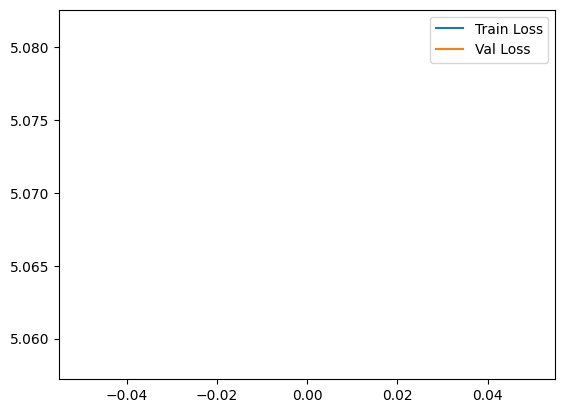

In [215]:

sns.lineplot(x = range(epochs), y= train_losses, label = "Train Loss")
sns.lineplot(x = range(epochs), y= val_losses, label = "Val Loss")
batch.shape #Foto 
model.eval() #Modo evaluación
y_prob = model(batch) #Evaluamos el modelo 
y_prob

In [220]:
#df = pd.DataFrame(y_prob.detach().cpu().numpy(), columns=classes, index=["pokemon"])
#df.T.sort_values("pokemon", ascending=False).head(5)

In [218]:


# Ruta de la imagene que se quiere buscar
ruta_imagen = "C://Users//sebas//Downloads//archive (13)//PokemonData//Graveler//8aaf28f52b7e4fdebadd19cce77144b1.jpg"  # 👈 Cambia por tu imagen

# Transformaciones 
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Cargar imagen y aplicar transformaciones
imagen = Image.open(ruta_imagen).convert("RGB")
input_tensor = transform(imagen).unsqueeze(0)  

model.eval()

# Predecir sin gradientes
with torch.no_grad():
    output = model(input_tensor)
    probabilidades = torch.nn.functional.softmax(output, dim=1)
    pred_index = probabilidades.argmax().item()

print(f"El pokemon es: {classes[pred_index]}")

El pokemon es: Ekans
